# Project: Bubble Map of Alberta

This is my first documented project.  I intend to make a map with cities represented as bubbles proportional to population.  It is simple but will be a very good reminder of some of the things I need to know to plot good maps.

In [5]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
# Extracted the folder from StatsCan
# Can try to have GeoPandas read the zip file directly next time

mapdf = gpd.read_file('./lpr_000b16a_e/lpr_000b16a_e.shp')

<AxesSubplot:>

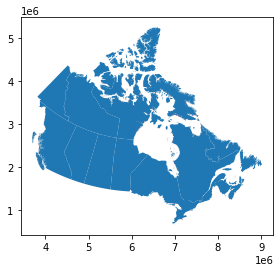

In [7]:
mapdf.plot()

In [8]:
mapdf.loc[:, ['PRUID', 'PRNAME']]

,PRUID,PRNAME
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...
1,11,Prince Edward Island / Île-du-Prince-Édouard
2,12,Nova Scotia / Nouvelle-Écosse
3,13,New Brunswick / Nouveau-Brunswick
4,24,Quebec / Québec
5,35,Ontario
6,46,Manitoba
7,47,Saskatchewan
8,48,Alberta
9,59,British Columbia / Colombie-Britannique


In [9]:
alberta = mapdf[mapdf['PRUID']=='48']

In [10]:
alberta

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."


In [12]:
# make points for Edmonton and Calgary as practice
cities = pd.DataFrame({'name': ['Calgary', 'Edmonton'], 'lat': [51.049999,53.631611], 'lon':[-114.066666,-113.323975]})
cities_gdf = gpd.GeoDataFrame(cities,
                              geometry=gpd.points_from_xy(cities['lon'], cities['lat']), crs='epsg:4326')
cities_gdf = cities_gdf.to_crs('epsg:3347')

<AxesSubplot:>

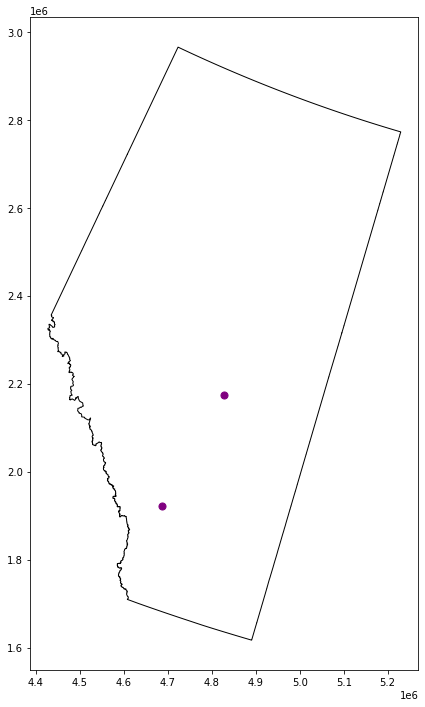

In [16]:
fig, ax = plt.subplots(figsize=(25,12))

cities_gdf.plot(ax=ax, color='purple', markersize=50)
alberta.plot(ax=ax, facecolor='none', edgecolor='black')

In [21]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [26]:
world[world['name'] == 'Canada']
world = world.to_crs(epsg=3347)

<AxesSubplot:>

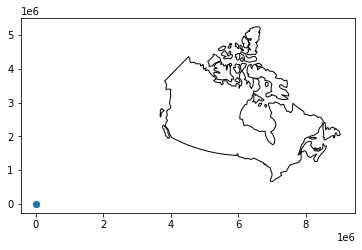

In [27]:
fig, ax = plt.subplots()
world[world['name'] == 'Canada'].plot(ax=ax, color='white', edgecolor='black')
cities_gdf.plot(ax=ax)

<b>Lessons learned:</b>

- Lat/long coordinates are entered as WGS84 (EPSG:4326).  Enter it as these and then convert.
- All maps need to be in the same CRS.  Check with attribute .crs and use gdf.to_crs(epsg=XXXX) to convert.